In [1]:
.libPaths( c( .libPaths(), "/home/amazigh.mokhtari/NeuroDev_ADD/R/r_3.6.0/") )


In [2]:
# ##### Load the Data 

# omics = readRDS ("/home//amazigh.mokhtari/NeuroDev_ADD/Psy/CT_Scar/Analysis/CT-Scar/00_RGCCA/RGCCA_Multi_MDD/male_data_momix_omics.RDS")
# DNAm = readRDS  ("data_correc_MaleMDD.RDS")
# omics$DNAm = DNAm [ rownames(omics$miRNA) , ] 

# saveRDS (omics , "00_Data/MDD_Male_DNAm_No_preserv.RDS")


In [24]:
omics = readRDS ("00_Data/MDD_Male_DNAm_No_preserv.RDS")

In [13]:
library(omicade4)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# Number of Factors
num.factors = 10

In [8]:
omics$covariates$Group = as.numeric (as.factor (omics$covariates$Group))  

In [15]:
omics$covariates = omics$covariates %>% select (Group) %>% 

In [20]:
omics$covariates = as.matrix (omics$covariates)

In [6]:
### Apply MCIA 

factorizations_mcia = mcia( lapply(omics [1:3] ,t)  , cia.nf = num.factors)


In [7]:
saveRDS (factorizations_mcia , "02_Results/01_MDD_Male_DNAm_No_preserv/01_factorizations_mcia_dry.RDS")

In [10]:
### Get the factors Matrix

factors_mcia = as.matrix(factorizations_mcia$mcoa$SynVar)
colnames (factors_mcia) = paste0 ( "MCIA_", 1:10)

In [14]:
factors_mcia_cov = cbind(  factors_mcia , omics$covariates [ match(rownames(factors_mcia) , rownames( omics$covariates) ) ,] ) 

In [16]:
saveRDS(factors_mcia , file = "02_Results/01_MDD_Male_DNAm_No_preserv/factors_mcia.RDS")
saveRDS(factors_mcia_cov , file = "02_Results/01_MDD_Male_DNAm_No_preserv/factors_mcia_cov.RDS")

In [9]:
# saveRDS(factorizations_mcia , "/home//amazigh.mokhtari/NeuroDev_ADD/Psy/CT_Scar/Analysis/CT-Scar/00_RGCCA/RGCCA_Multi_MDD/000_poster_res/factorizations_mcia.RDS")

# saveRDS(factorizations_mcia , "/home//amazigh.mokhtari/NeuroDev_ADD/Psy/CT_Scar/Analysis/CT-Scar/00_RGCCA/RGCCA_Multi_MDD/000_poster_res/factorizations_mcia_Nopreserv.RDS")

In [10]:
factorizations_mcia[[1]]

mcia(df.list = lapply(omics[1:3], t), cia.nf = num.factors)

In [23]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [44]:
factors_mcia_cov

,SynVar1,SynVar2,Centre,N_Inclusion,Group,Name,ID_ICM,ID_IGBMC,ID_TGML,PCA_Sub_Group,⋯,Paykel_Interview_for_Recent_Life_Events_number,Paykel_Interview_for_Recent_Life_Events_YN,Sample_Name,Sample_ID,Array,Slide,Sample_Name.1,Sample_ID.1,Array.1,Slide.1
,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>
PCLZ117,-1.94330379,0.783393439,2,2,Patient,202-1,,PCLZ117,S002404,,⋯,2,Yes,204679630120_R08C01,202-1,R08C01,204679630120,204668820083_R05C01,131-2,R05C01,204668820083
PCLZ118,-0.18715861,0.292260501,2,7,Patient,207-1,,PCLZ118,S002406,,⋯,0,No,204972790073_R08C01,207-1,R08C01,204972790073,204674430075_R04C01,71245-015-054,R04C01,204674430075
PCLZ119,-0.54734537,0.282722105,2,8,Patient,208-1,,PCLZ119,S002408,,⋯,NA,NA,204679630045_R07C01,208-1,R07C01,204679630045,204668820048_R06C01,71245-002-005,R06C01,204668820048
PCLZ121,0.29314402,2.241516533,2,15,Patient,215-1,,PCLZ121,S002412,,⋯,2,Yes,204679630111_R07C01,215-1,R07C01,204679630111,204668820083_R02C01,71245-007-003,R02C01,204668820083
PCLZ122,-0.40431289,1.453866062,2,19,Patient,219-1,,PCLZ122,S002414,,⋯,0,No,204564470021_R03C01,219-1,R03C01,204564470021,204564460100_R06C01,71245-004-015,R06C01,204564460100
PCLZ123,0.05332376,0.205363629,3,2,Patient,302-1,,PCLZ123,S002416,,⋯,NA,NA,204568260026_R04C01,302-1,R04C01,204568260026,204564470092_R02C01,193-2,R02C01,204564470092
PCLZ124,-1.04144622,0.048455201,3,3,Patient,303-1,,PCLZ124,S002418,,⋯,NA,NA,204679630077_R01C01,303-1,R05C01,204679630044,204668820048_R07C01,71245-003-007,R07C01,204668820048
PCLZ126,-0.42367597,0.696142224,3,13,Patient,313-1,,PCLZ126,S002422,,⋯,NA,NA,204568260023_R02C01,313-1,R02C01,204568260023,204564470040_R06C01,147-1,R06C01,204564470040
PCLZ127,-0.77462041,-0.463987060,3,15,Patient,315-1,,PCLZ127,S002424,,⋯,NA,NA,204679630043_R02C01,315-1,R02C01,204679630043,204568260026_R05C01,806-1,R05C01,204568260026


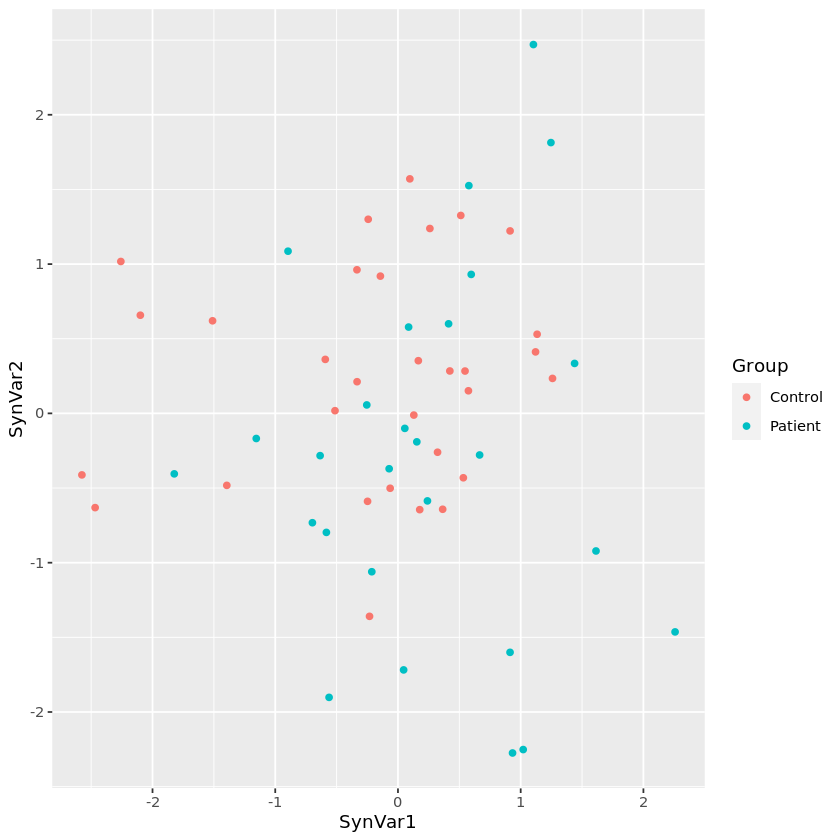

In [43]:
factors_mcia_cov [ , 1:15] %>% ggplot (aes (x =SynVar1, y =SynVar2 , color = Group )) +
    geom_point()

In [23]:
metagenes_mcia<-list()
  for(j in 1:length(omics)){
    metagenes_mcia[[j]]<-as.matrix(factorizations_mcia$mcoa$axis[1:dim(omics[[j]])[1],])
    rownames(metagenes_mcia[[j]])<-rownames(omics[[j]])
    colnames(metagenes_mcia[[j]])<-1:num.factors
  }

In [10]:
 


  factorizations_mcia<-mcia(omics_pos, cia.nf = num.factors)
  factors_mcia<-as.matrix(factorizations_mcia$mcoa$SynVar)
  metagenes_mcia<-list()
  for(j in 1:length(omics)){
    metagenes_mcia[[j]]<-as.matrix(factorizations_mcia$mcoa$axis[1:dim(omics[[j]])[1],])
    rownames(metagenes_mcia[[j]])<-rownames(omics[[j]])
    colnames(metagenes_mcia[[j]])<-1:num.factors
  }
  factorizations[[t]]<-list(factors_mcia,metagenes_mcia)
  t<-t+1
  method<-c(method,"MCIA")

ERROR: Error in lapply(df.list, function(x) {: object 'omics_pos' not found


In [ ]:
  ###MOFA
  MOFAobject <- createMOFAobject(omics)
  DataOptions <- getDefaultDataOptions()
  ModelOptions <- getDefaultModelOptions(MOFAobject)
  ModelOptions$numFactors <- num.factors
  TrainOptions <- getDefaultTrainOptions()
  
  MOFAobject <- prepareMOFA(
    MOFAobject,
    DataOptions = DataOptions,
    ModelOptions = ModelOptions,
    TrainOptions = TrainOptions
  )
  MOFAobject <- runMOFA(MOFAobject)
  metagenes_mofa <- getWeights(
    MOFAobject
  )
  
  factors_mofa <- getFactors(
    MOFAobject
  )

Creating MOFA object from list of matrices,
 please make sure that samples are columns and features are rows...


Checking data options...

Checking training options...

Checking model options...



In [15]:
calculateVarianceExplained  = calculateVarianceExplained  (MOFAobject)

In [17]:
calculateVarianceExplained$R2PerFactor

,DNAm,mRNA,miRNA
LF1,7.965280e-05,1.273829e-01,9.352562e-02
LF2,1.089063e-05,1.573362e-01,6.373939e-06
LF3,9.573487e-02,1.902822e-05,2.824127e-03
LF4,6.156332e-02,6.423070e-03,3.068388e-04
LF5,5.186153e-05,6.766979e-02,3.133224e-06
LF6,1.899885e-02,4.661358e-05,6.114998e-05
LF7,8.043005e-03,5.325962e-03,2.841004e-05
LF8,4.674067e-03,6.382693e-03,1.501408e-04
LF9,5.363306e-03,2.129404e-05,5.070476e-05
LF10,1.728212e-03,1.186390e-04,2.665415e-05


In [13]:
metagenes_mofa <- getWeights(
    MOFAobject
  )

In [11]:
factors_mofa <- getFactors(
    MOFAobject
  )

In [ ]:
factors_mofa

In [18]:
mof_res = list( factors_mofa   = factors_mofa,
                All_features = metagenes_mofa,
                calculateVarianceExplained = calculateVarianceExplained)

In [19]:
saveRDS(mof_res,"mof_res.RDS")

In [10]:
saveRDS(MOFAobject,"MOFAobject.RDS")

In [9]:
typeof(MOFAobject)

[1] "S4"

In [6]:
metagenes_mofa <- getWeights(
    MOFAobject
  )

ERROR: Error in is(object, "MOFAmodel"): object 'MOFAobject' not found


In [67]:
which.max(metagenes_mofa$mRNA %>% as.data.frame %>% .$LF1)

[1] 5769

In [66]:
which.min(metagenes_mofa$mRNA %>% as.data.frame %>% .$LF1)

[1] 8055

In [68]:
metagenes_mofa$mRNA [ c(5769,8055) ,]

,LF1,LF2
ENSG00000139116,0.2993006,-0.001681886
ENSG00000163931,-0.2769842,0.011257904


In [69]:
 factors_mofa <- getFactors(
    MOFAobject
  )

In [71]:
factors_mofa


factors_mofa_cov = cbind(  factors_mofa , omicst$covariates [ match(rownames(factors_mofa) , rownames( omicst$covariates) ) ,] ) 

,LF1,LF2
PCLZ117,0.445302048,-0.272326065
PCLZ118,-0.255695539,0.366341547
PCLZ119,-0.631846065,0.018189558
PCLZ121,-1.006473451,0.219742791
PCLZ122,-0.394606548,0.203970331
PCLZ123,0.907258282,-0.005706666
PCLZ124,0.547324029,-0.217534917
PCLZ126,-0.196804798,0.199079220
PCLZ127,-0.257735692,0.284657841
PCLZ130,0.665310243,0.342154822


In [72]:
factors_mofa_cov

,LF1,LF2,Centre,N_Inclusion,Group,Name,ID_ICM,ID_IGBMC,ID_TGML,PCA_Sub_Group,⋯,Paykel_Interview_for_Recent_Life_Events_number,Paykel_Interview_for_Recent_Life_Events_YN,Sample_Name,Sample_ID,Array,Slide,Sample_Name.1,Sample_ID.1,Array.1,Slide.1
,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>
PCLZ117,0.445302048,-0.272326065,2,2,Patient,202-1,,PCLZ117,S002404,,⋯,2,Yes,204679630120_R08C01,202-1,R08C01,204679630120,204668820083_R05C01,131-2,R05C01,204668820083
PCLZ118,-0.255695539,0.366341547,2,7,Patient,207-1,,PCLZ118,S002406,,⋯,0,No,204972790073_R08C01,207-1,R08C01,204972790073,204674430075_R04C01,71245-015-054,R04C01,204674430075
PCLZ119,-0.631846065,0.018189558,2,8,Patient,208-1,,PCLZ119,S002408,,⋯,NA,NA,204679630045_R07C01,208-1,R07C01,204679630045,204668820048_R06C01,71245-002-005,R06C01,204668820048
PCLZ121,-1.006473451,0.219742791,2,15,Patient,215-1,,PCLZ121,S002412,,⋯,2,Yes,204679630111_R07C01,215-1,R07C01,204679630111,204668820083_R02C01,71245-007-003,R02C01,204668820083
PCLZ122,-0.394606548,0.203970331,2,19,Patient,219-1,,PCLZ122,S002414,,⋯,0,No,204564470021_R03C01,219-1,R03C01,204564470021,204564460100_R06C01,71245-004-015,R06C01,204564460100
PCLZ123,0.907258282,-0.005706666,3,2,Patient,302-1,,PCLZ123,S002416,,⋯,NA,NA,204568260026_R04C01,302-1,R04C01,204568260026,204564470092_R02C01,193-2,R02C01,204564470092
PCLZ124,0.547324029,-0.217534917,3,3,Patient,303-1,,PCLZ124,S002418,,⋯,NA,NA,204679630077_R01C01,303-1,R05C01,204679630044,204668820048_R07C01,71245-003-007,R07C01,204668820048
PCLZ126,-0.196804798,0.199079220,3,13,Patient,313-1,,PCLZ126,S002422,,⋯,NA,NA,204568260023_R02C01,313-1,R02C01,204568260023,204564470040_R06C01,147-1,R06C01,204564470040
PCLZ127,-0.257735692,0.284657841,3,15,Patient,315-1,,PCLZ127,S002424,,⋯,NA,NA,204679630043_R02C01,315-1,R02C01,204679630043,204568260026_R05C01,806-1,R05C01,204568260026


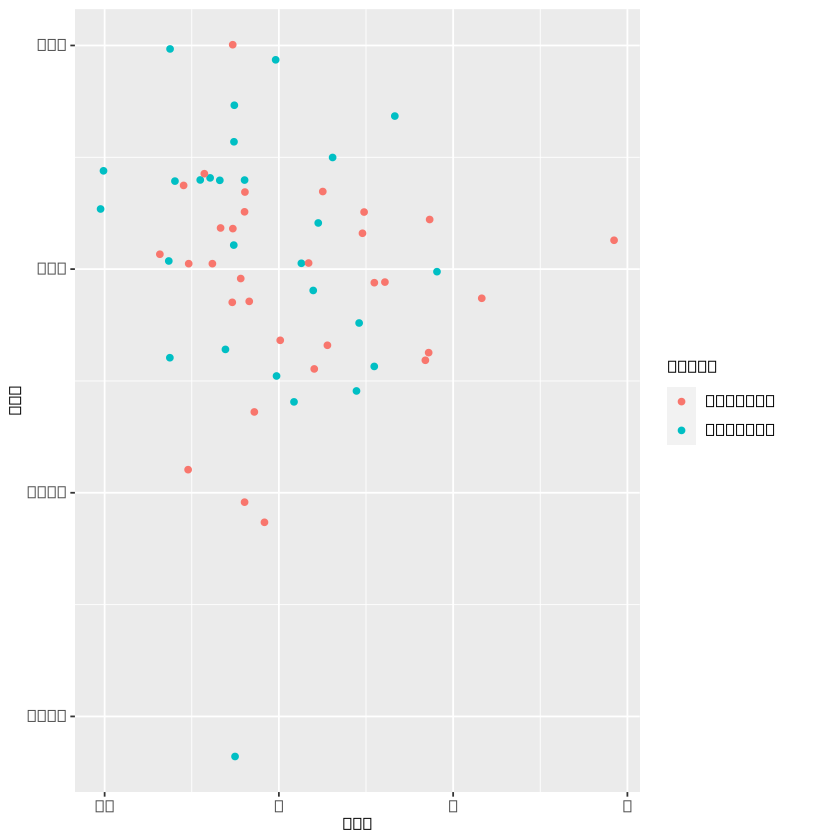

In [73]:
factors_mofa_cov [ , 1:15] %>% ggplot (aes (x =LF1, y =LF2 , color = Group )) +
    geom_point()

In [25]:
factorizations_icluster

ERROR: Error in eval(expr, envir, enclos): object 'factorizations_icluster' not found


In [26]:
  ###iCluster
factorizations_icluster<-iCluster2(lapply ( omics , t ) [1:2] , k=num.factors+1)
saveRDS(factorizations_icluster , "factorizations_icluster.RDS")  

In [24]:
lapply (lapply ( omics , t ) , dim)

$miRNA
[1]  58 751

$mRNA
[1]    58 14705

$DNAm
[1]     58 724504

In [ ]:
                                       
  ###intNMF
  factorizations_intnmf<-nmf.mnnals(dat=omics, k=num.factors)
saveRDS(factorizations_intnmf , "factorizations_intnmf.RDS")                                         
  ### JIVE

factorizations_jive<-jive(omics, rankJ=num.factors, rankA = rep(num.factors, length(omics)), method = "given", conv = "default", maxiter = 100, showProgress=FALSE)
saveRDS(factorizations_jive , "factorizations_jive.RDS")                                         

                                            
